In [1]:
#SEE MAY RAINFALL AND PREDICT JJAS RAINFALL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('rainfall_in_india_1901-2015.csv')

In [3]:
X=dataset.iloc[3889:4003,6:7].values
y=dataset.iloc[3889:4003,17:18].values
z=dataset.iloc[3889:4003,1:2].values

In [ ]:
z


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',epsilon=0.15,C=.8)
regressor.fit(X_train, y_train)

/home/rajesh/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.15, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
from sklearn.externals import joblib
filename='model_SVR.sav'
joblib.dump(regressor, filename)

['model_SVR.sav']

In [7]:
loaded_model = joblib.load('model_SVR.sav')

In [8]:
y_pred = regressor.predict(X_test)



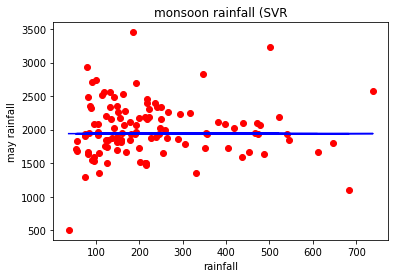

In [11]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('monsoon rainfall (SVR')
plt.xlabel('rainfall')
plt.ylabel('may rainfall')
plt.show()

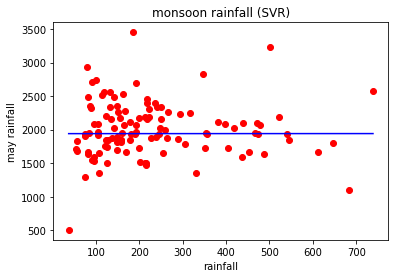

In [10]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('monsoon rainfall (SVR)')
plt.xlabel('rainfall')
plt.ylabel('may rainfall')
plt.show()

In [9]:
# Predicting a new result
y_pred = regressor.predict(X_test)

In [10]:
#from sklearn.metrics import mean_squared_error
#print (mean_squared_error(y_test, y_pred))

In [11]:
import statsmodels
print('%s'% statsmodels.__version__)

0.8.0


In [12]:
from mpl_toolkits import mplot3d

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)


In [15]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = z
xline = X
yline = y
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)
/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:1524: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  if len(args[0]) == 0 or cbook.is_scalar(args[0][0]) :
/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:2343: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  cstr = cbook.is_string_like(c) or cbook.is_sequence_of_strings(c)
/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:2343: MatplotlibDeprecationWarning: The is_sequence_of_strings function was deprecated in version 2.1.
  cstr = cbook.is_string_

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:247: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.draw(renderer)


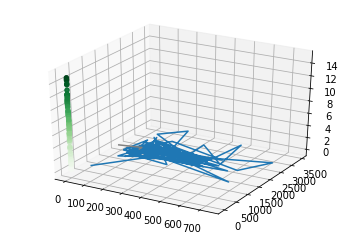

In [16]:
plt.show()

In [ ]:
plt.show()

In [17]:
def f(x, y):
    return np.sin(np.sqrt(X * 2 + y * 2))


X, Y = np.meshgrid(X, y)
Z = f(X, Y)

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)


/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:247: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.draw(renderer)


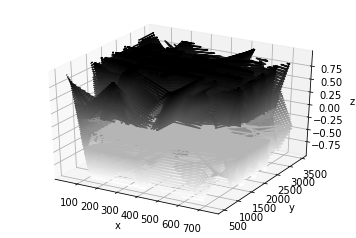

In [19]:
plt.show()

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('year')
plt.ylabel('rain')
plt.show()

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)


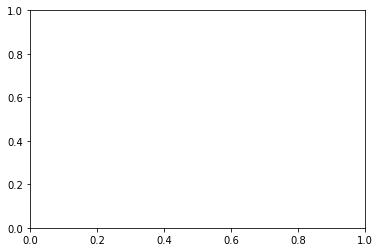

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:247: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.draw(renderer)


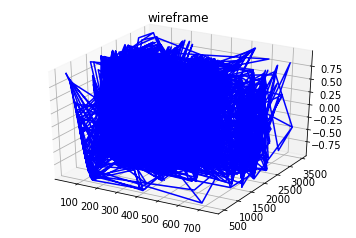

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_title('wireframe');
plt.show()

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)
/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:247: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.draw(renderer)


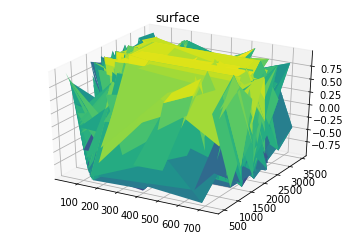

In [24]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
plt.show()

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)
/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:247: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.draw(renderer)
/home/rajesh/.local/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/rajesh/.local/lib/python3.5/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None,

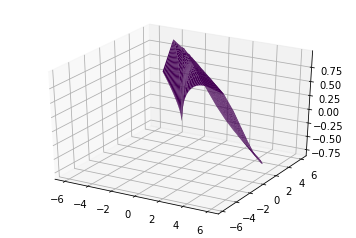

In [25]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
plt.show()

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)
/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:2343: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  cstr = cbook.is_string_like(c) or cbook.is_sequence_of_strings(c)
/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:2343: MatplotlibDeprecationWarning: The is_sequence_of_strings function was deprecated in version 2.1.
  cstr = cbook.is_string_like(c) or cbook.is_sequence_of_strings(c)
/home/rajesh/.local/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:539: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(obj) and not isi

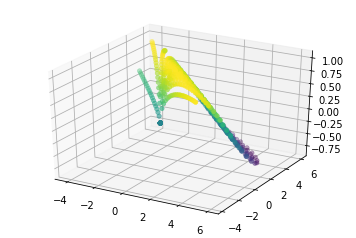

In [26]:
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5);
plt.show()

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(X, Y, Z,
                cmap='viridis', edgecolor='none');
plt.show()